In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv("Loan_data.csv")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
property_Area         object
Loan_Status           object
dtype: object

# Univariateof Numerical Feature

In [8]:
data = df.copy()

In [9]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
data.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
ApplicantIncome,612.0,5405.540850,6118.914057,150.0,1025.0,1894.85,2214.7,2875.75,3806.0,5803.75,9489.3,14583.0,32741.27,81000.0
CoapplicantIncome,613.0,1620.888940,2928.624748,0.0,0.0,0.00,0.0,0.00,1167.0,2302.00,3786.8,4997.6,8902.36,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,30.0,56.00,71.0,100.00,128.0,168.00,235.8,297.8,496.36,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,84.0,180.00,294.0,360.00,360.0,360.00,360.0,360.0,480.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,0.0,0.00,0.0,1.00,1.0,1.00,1.0,1.0,1.00,1.0


# Univariate of Categorical Data

In [17]:
data['Gender'].value_counts()

Male      487
Female    112
Name: Gender, dtype: int64

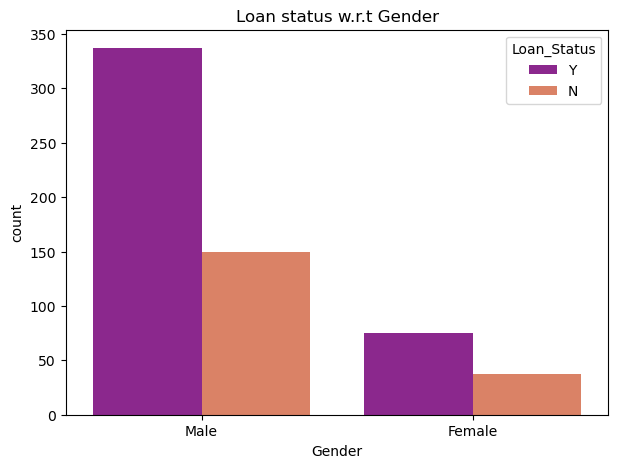

In [21]:
plt.figure(figsize=(7,5))
sns.countplot(x= 'Gender',hue = 'Loan_Status',data=data, palette='plasma' )
plt.title("Loan status w.r.t Gender")
plt.show()

In [ ]:
# So male are more whose laon_status  is yes

In [22]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

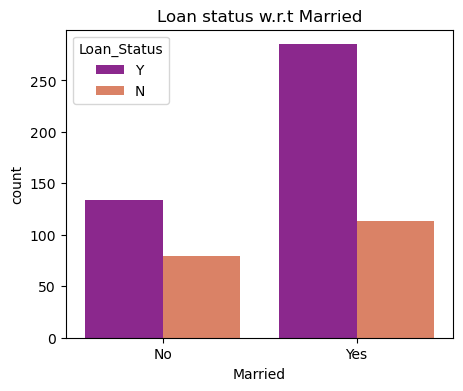

In [25]:
plt.figure(figsize=(5,4))
sns.countplot(x= 'Married',hue = 'Loan_Status',data=data, palette='plasma' )
plt.title("Loan status w.r.t Married")
plt.show()

In [ ]:
# married are taking more loan

In [26]:
data['Education'].value_counts()

Graduate        479
Not Graduate    134
Name: Education, dtype: int64

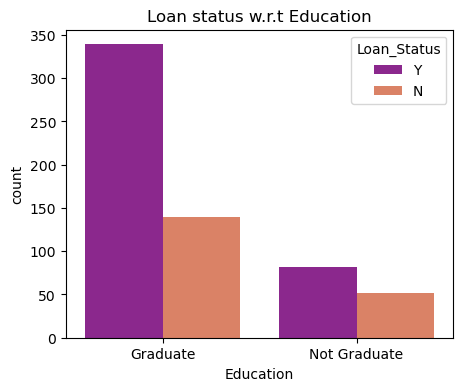

In [27]:
plt.figure(figsize=(5,4))
sns.countplot(x= 'Education',hue = 'Loan_Status',data=data, palette='plasma' )
plt.title("Loan status w.r.t Education")
plt.show()

In [41]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

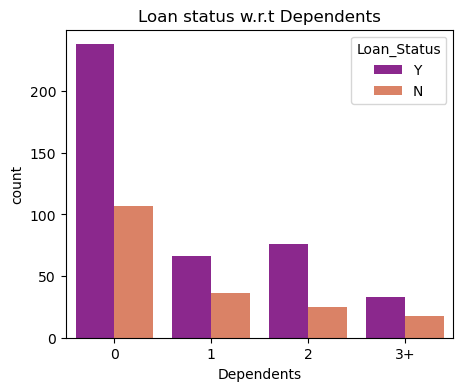

In [42]:
plt.figure(figsize=(5,4))
sns.countplot(x= 'Dependents',hue = 'Loan_Status',data=data, palette='plasma' )
plt.title("Loan status w.r.t Dependents")
plt.show()

In [29]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

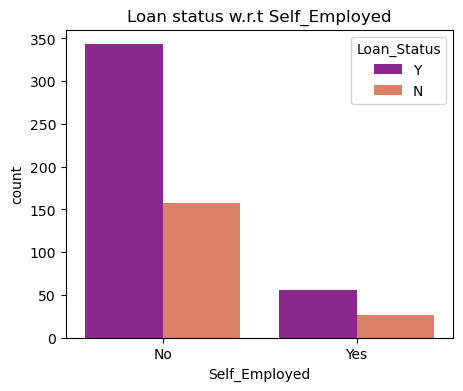

In [30]:
plt.figure(figsize=(5,4))
sns.countplot(x= 'Self_Employed',hue = 'Loan_Status',data=data, palette='plasma' )
plt.title("Loan status w.r.t Self_Employed")
plt.show()

In [31]:
data['property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: property_Area, dtype: int64

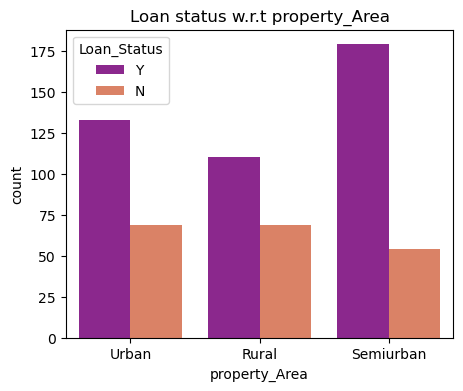

In [32]:
plt.figure(figsize=(5,4))
sns.countplot(x= 'property_Area',hue = 'Loan_Status',data=data, palette='plasma' )
plt.title("Loan status w.r.t property_Area")
plt.show()

In [34]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

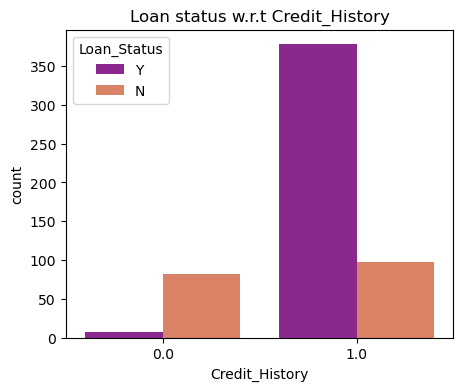

In [37]:
plt.figure(figsize=(5,4))
sns.countplot(x= 'Credit_History',hue = 'Loan_Status',data=data, palette='plasma' )
plt.title("Loan status w.r.t Credit_History")
plt.show()

# Missing value Imputation

In [38]:
data.isnull().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
dtype: int64

In [39]:
data['Gender'].fillna('Male',inplace=True)

In [40]:
data['Married'].fillna('Yes',inplace=True)

In [43]:
data['Dependents'].fillna('0',inplace=True)

In [44]:
data['Education'].fillna('Graduate',inplace=True)

In [45]:
data['Self_Employed'].fillna('No',inplace=True)

In [46]:
data['ApplicantIncome'].fillna(data['ApplicantIncome'].mean(),inplace=True)

In [47]:
data['CoapplicantIncome'].fillna(data['CoapplicantIncome'].mean(),inplace=True)

In [48]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [49]:
data['Loan_Amount_Term'].fillna(360,inplace=True)

In [50]:
data['Credit_History'].fillna(1.0,inplace=True)

In [51]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
Loan_Status          0
dtype: int64

# Bivariate of categorical feature

In [53]:
data.groupby(['Loan_Status','Gender'])['Loan_ID'].count().reset_index()

,Loan_Status,Gender,Loan_ID
0,N,Female,37
1,N,Male,155
2,Y,Female,75
3,Y,Male,347


In [54]:
data.groupby(['Loan_Status','Married'])['Loan_ID'].count().reset_index()

,Loan_Status,Married,Loan_ID
0,N,No,79
1,N,Yes,113
2,Y,No,134
3,Y,Yes,288


In [55]:
data.groupby(['Loan_Status','Dependents'])['Loan_ID'].count().reset_index()


,Loan_Status,Dependents,Loan_ID
0,N,0,113
1,N,1,36
2,N,2,25
3,N,3+,18
4,Y,0,247
5,Y,1,66
6,Y,2,76
7,Y,3+,33


In [56]:
data.groupby(['Loan_Status','Education'])['Loan_ID'].count().reset_index()


,Loan_Status,Education,Loan_ID
0,N,Graduate,140
1,N,Not Graduate,52
2,Y,Graduate,340
3,Y,Not Graduate,82


In [57]:
data.groupby(['Loan_Status','Self_Employed'])['Loan_ID'].count().reset_index()

,Loan_Status,Self_Employed,Loan_ID
0,N,No,166
1,N,Yes,26
2,Y,No,366
3,Y,Yes,56


In [58]:
data.groupby(['Loan_Status','property_Area'])['Loan_ID'].count().reset_index()

,Loan_Status,property_Area,Loan_ID
0,N,Rural,69
1,N,Semiurban,54
2,N,Urban,69
3,Y,Rural,110
4,Y,Semiurban,179
5,Y,Urban,133


# Outlier using box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x15eaf819f00>,
 'caps': [<matplotlib.lines.Line2D at 0x15eaf81a6e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15eaf819ea0>],
 'medians': [<matplotlib.lines.Line2D at 0x15eaf81aa40>],
 'fliers': [<matplotlib.lines.Line2D at 0x15eaf81ac50>],
 'means': []}

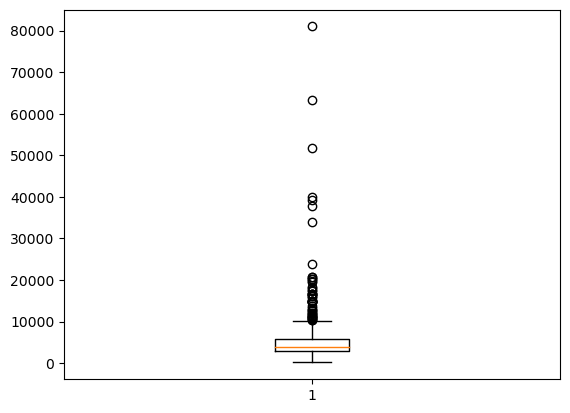

In [59]:
plt.boxplot(data['ApplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x15eafbb2050>,
 'caps': [<matplotlib.lines.Line2D at 0x15eafbb2590>,
 'boxes': [<matplotlib.lines.Line2D at 0x15eafbb1db0>],
 'medians': [<matplotlib.lines.Line2D at 0x15eafbb2ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15eafbb2d70>],
 'means': []}

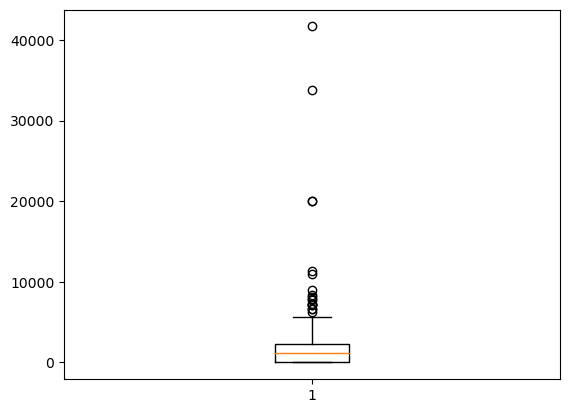

In [60]:
plt.boxplot(data['CoapplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x15eaff8c460>,
 'caps': [<matplotlib.lines.Line2D at 0x15eaff8c9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15eaff8c1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x15eaff8cf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x15eaff8d1b0>],
 'means': []}

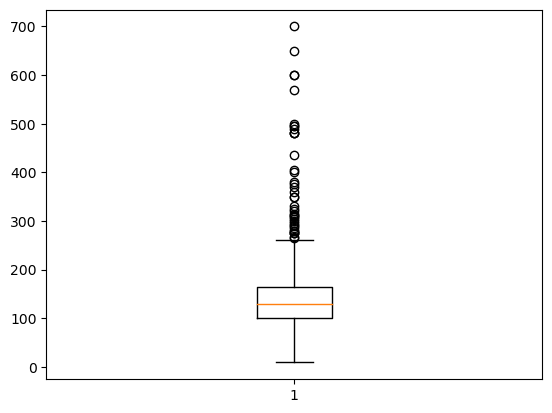

In [61]:
plt.boxplot(data['LoanAmount'])

In [69]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status'],
      dtype='object')

In [72]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
property_Area         object
Loan_Status           object
dtype: object

In [73]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [74]:
data.corr()

C:\Users\Pallavi.Mangal\AppData\Local\Temp\ipykernel_6272\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116625,0.565552,-0.046439,-0.018475
CoapplicantIncome,-0.116625,1.000000,0.187884,-0.059417,0.011084
LoanAmount,0.565552,0.187884,1.000000,0.036475,-0.001431
Loan_Amount_Term,-0.046439,-0.059417,0.036475,1.000000,-0.004705
Credit_History,-0.018475,0.011084,-0.001431,-0.004705,1.000000


C:\Users\Pallavi.Mangal\AppData\Local\Temp\ipykernel_6272\789365784.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),vmax=0.5,linewidth=0.1,cmap='coolwarm')


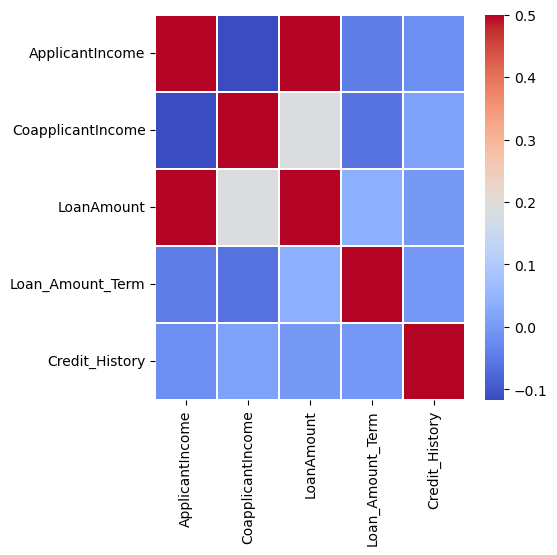

In [81]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),vmax=0.5,linewidth=0.1,cmap='coolwarm')
plt.show()

# Splitting Data with No and Yes

In [87]:
data1 = data[data['Loan_Status']=='Y']
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232.0,1950.0,108.000000,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y


In [86]:
data2 = data[data['Loan_Status']=='N']
data2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N
7,LP001014,Male,Yes,3+,Graduate,No,3036.00000,2504.0,158.000000,360.0,0.0,Semiurban,N
9,LP001020,Male,Yes,1,Graduate,No,12841.00000,10968.0,349.000000,360.0,1.0,Semiurban,N
13,LP001029,Male,No,0,Graduate,No,1853.00000,2840.0,114.000000,360.0,1.0,Rural,N
17,LP001036,Female,No,0,Graduate,No,3510.00000,0.0,76.000000,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383.00000,1000.0,187.000000,360.0,1.0,Rural,N
597,LP002943,Male,No,0,Graduate,No,2987.00000,0.0,88.000000,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,No,416.00000,41667.0,350.000000,180.0,1.0,Urban,N
605,LP002960,Male,Yes,0,Not Graduate,No,2400.00000,3800.0,146.412162,180.0,1.0,Urban,N


# Converting Variable for Modelling

In [89]:
data_d=pd.get_dummies(data,columns=['Dependents','property_Area'], drop_first=True)

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
le = LabelEncoder()

In [92]:
data_d.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,property_Area_Semiurban,property_Area_Urban
0,LP001002,Male,No,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Y,0,0,0,0,1
1,LP001003,Male,Yes,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,N,1,0,0,0,0
2,LP001005,Male,Yes,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Y,0,0,0,0,1
3,LP001006,Male,Yes,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Y,0,0,0,0,1
4,LP001008,Male,No,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Y,0,0,0,0,1


In [96]:
for i in data_d.columns:
    if (data_d[i].dtypes=='object') and (i !='Loan_ID'):
        data_d[i]=le.fit_transform(data_d[i])

In [97]:
data_d.drop('Loan_ID', axis = 1, inplace =True)

In [98]:
data_d

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,property_Area_Semiurban,property_Area_Urban
0,1,0,0,0,5849.00000,0.0,146.412162,360.0,1.0,1,0,0,0,0,1
1,1,1,0,0,5405.54085,1508.0,128.000000,360.0,1.0,0,1,0,0,0,0
2,1,1,0,1,3000.00000,0.0,66.000000,360.0,1.0,1,0,0,0,0,1
3,1,1,1,0,2583.00000,2358.0,120.000000,360.0,1.0,1,0,0,0,0,1
4,1,0,0,0,6000.00000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900.00000,0.0,71.000000,360.0,1.0,1,0,0,0,0,0
610,1,1,0,0,4106.00000,0.0,40.000000,180.0,1.0,1,0,0,1,0,0
611,1,1,0,0,8072.00000,240.0,253.000000,360.0,1.0,1,1,0,0,0,1
612,1,1,0,0,7583.00000,0.0,187.000000,360.0,1.0,1,0,1,0,0,1


In [99]:
data_d.dtypes

Gender                       int32
Married                      int32
Education                    int32
Self_Employed                int32
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int32
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
property_Area_Semiurban      uint8
property_Area_Urban          uint8
dtype: object

# Logistic Regression

In [100]:
X = data_d.drop('Loan_Status' , axis = True)

In [135]:
y= data_d.Loan_Status

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [137]:
lr=LogisticRegression()

In [138]:
X_train.shape

(429, 14)

In [139]:
X_test.shape

(185, 14)

In [140]:
y_test.shape

(185,)

In [141]:
lr.fit(X_train , y_train)

LogisticRegression()

In [142]:
#cross validation
kfold=KFold(n_splits=5,shuffle= True,random_state=10)

In [143]:
pred_train_kfold=cross_val_predict(lr,X_train,y_train,cv=kfold)

C:\Users\Pallavi.Mangal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:
#prediction on train
pred_train=lr.predict(X_train)

In [145]:
pred_proba_train=lr.predict_proba(X_train)[:,1]

In [147]:
print(confusion_matrix(y_train,pred_train))
print(accuracy_score(y_train,pred_train))
print(recall_score(y_train,pred_train))
print(precision_score(y_train,pred_train))
print(f1_score(y_train,pred_train))

[[ 60  71]
 [  5 293]]
0.8228438228438228
0.9832214765100671
0.804945054945055
0.8851963746223566


In [148]:
fpr,tpr,thr=roc_curve(y_train,pred_proba_train,drop_intermediate=False)

In [149]:
roc_auc_score(y_train,pred_proba_train)

0.7967877452738357

In [150]:
#prediction on test
pred_test=lr.predict(X_test)

In [151]:
pred_proba_test=lr.predict_proba(X_test)[:,1]

In [152]:
print(confusion_matrix(y_test,pred_test))
print(accuracy_score(y_test,pred_test))
print(recall_score(y_test,pred_test))
print(precision_score(y_test,pred_test))
print(f1_score(y_test,pred_test))

[[ 25  36]
 [  2 122]]
0.7945945945945946
0.9838709677419355
0.7721518987341772
0.8652482269503546


In [153]:
fpr1,tpr1,thr1=roc_curve(y_test,pred_proba_test,drop_intermediate=False)

In [154]:
print(thr1)

[1.97404617 0.97404617 0.97154972 0.94586937 0.92371626 0.91326475
 0.90797161 0.90438266 0.90414012 0.90326443 0.90186872 0.90124503
 0.89688001 0.89065945 0.88690791 0.88651705 0.88521471 0.88443654
 0.88377612 0.88232034 0.88220623 0.88131328 0.88064722 0.87837503
 0.87449618 0.87380131 0.87335555 0.87304072 0.87281785 0.87233151
 0.87194288 0.86982996 0.86976927 0.86806376 0.86760234 0.86362263
 0.86209872 0.86149565 0.85860595 0.85385674 0.850751   0.84927458
 0.84917506 0.84858422 0.84798045 0.84785948 0.84717646 0.84512572
 0.8447787  0.84403585 0.84380996 0.8410516  0.83898069 0.83572507
 0.83492761 0.83215917 0.8235692  0.82115405 0.82032187 0.81613058
 0.81599988 0.81170818 0.80798688 0.80748525 0.80745499 0.80667175
 0.80520626 0.80461001 0.79465767 0.79314925 0.79235488 0.79031405
 0.78818402 0.78815564 0.78363041 0.78307572 0.78305319 0.78219526
 0.78181625 0.78159254 0.77934527 0.77601148 0.77438352 0.77424233
 0.77274711 0.77204572 0.771332   0.77115331 0.76902099 0.7657

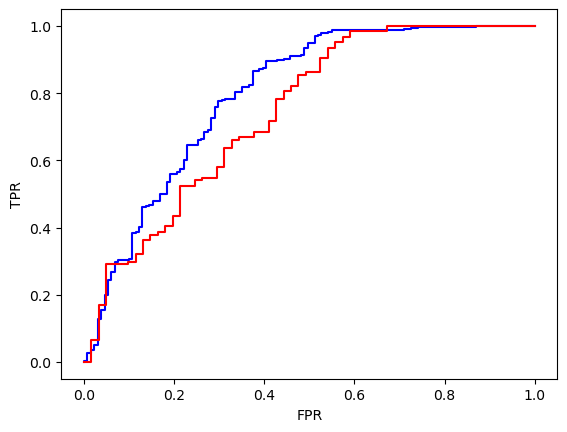

In [159]:
plt.plot(fpr,tpr,color='b')
plt.plot(fpr1,tpr1,color='r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [156]:
roc_auc_score(y_test,pred_proba_test)

0.7435219460602855

# Decision tree

In [227]:
Dt = DecisionTreeClassifier(criterion='entropy',max_depth=7)

In [228]:
Dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [229]:
# Prediction on train
pred_train1=Dt.predict(X_train)

In [230]:
pred_proba_train1= Dt.predict_proba(X_train)[:,1]

In [231]:
print(confusion_matrix(y_train,pred_train1))
print(accuracy_score(y_train,pred_train1))
print(recall_score(y_train,pred_train1))
print(precision_score(y_train,pred_train1))
print(f1_score(y_train,pred_train1))

[[ 71  60]
 [  0 298]]
0.8601398601398601
1.0
0.8324022346368715
0.9085365853658537


In [232]:
FPR,TPR,THR=roc_curve(y_train,pred_proba_train1)

In [233]:
roc_auc_score(y_train,pred_proba_train1)

0.8436523387468621

In [234]:
#prediction on test
pred_test1=Dt.predict(X_test)

In [235]:
pred_proba_test1=Dt.predict_proba(X_test)[:,1]

In [236]:
print(confusion_matrix(y_test,pred_test1))
print(accuracy_score(y_test,pred_test1))
print(recall_score(y_test,pred_test1))
print(precision_score(y_test,pred_test1))
print(f1_score(y_test,pred_test1))

[[ 23  38]
 [  4 120]]
0.772972972972973
0.967741935483871
0.759493670886076
0.851063829787234


In [237]:
FPR1,TPR1,THR1=roc_curve(y_test,pred_proba_test1)

In [238]:
roc_auc_score(y_test,pred_proba_test1)

0.6730565838180856

Text(0, 0.5, 'TPR')

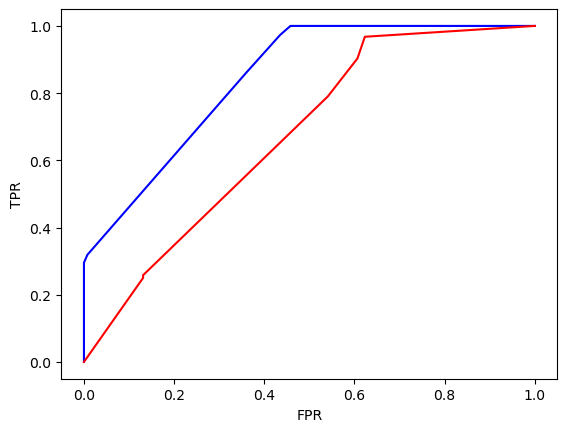

In [239]:
plt.plot(FPR,TPR,color='b')
plt.plot(FPR1,TPR1,color='r')
plt.xlabel('FPR')
plt.ylabel('TPR')

# Random Forest

In [240]:
from sklearn.ensemble import RandomForestClassifier

In [241]:
RF = RandomForestClassifier()

In [242]:
RF.fit(X_train , y_train)

RandomForestClassifier()

In [243]:
# Prediction on train
rf_pred_train=RF.predict(X_train)

In [244]:
print(confusion_matrix(y_train,rf_pred_train))
print(accuracy_score(y_train,rf_pred_train))
print(recall_score(y_train,rf_pred_train))
print(precision_score(y_train,rf_pred_train))
print(f1_score(y_train,rf_pred_train))

[[131   0]
 [  0 298]]
1.0
1.0
1.0
1.0


In [245]:
# Prediction on Test data
rf_pred_test = RF.predict(X_test)

In [246]:
print(confusion_matrix(y_test,rf_pred_test))
print(accuracy_score(y_test,rf_pred_test))
print(recall_score(y_test,rf_pred_test))
print(precision_score(y_test,rf_pred_test))
print(f1_score(y_test,rf_pred_test))

[[ 26  35]
 [  8 116]]
0.7675675675675676
0.9354838709677419
0.7682119205298014
0.8436363636363636


In [247]:
# It is overfitting , because traing accuracy is high compare to tets accuracy
# so we are going to do  Hyperparameter tuning

# Hyper parameter Tuning - Random Forest

In [248]:
from sklearn.model_selection import RandomizedSearchCV

In [249]:
params={'n_estimators':[75,100,125,150],
       'min_samples_leaf':[20,25,30,35],
       'max_depth':[4,5,6,7]}

In [250]:
rsv = RandomizedSearchCV(RF,params,n_iter=5)

In [251]:
rsv_rf = rsv.fit(X_train , y_train)

In [252]:
rsv_rf.best_params_

{'n_estimators': 150, 'min_samples_leaf': 25, 'max_depth': 5}

In [253]:
rsv_rf.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=25, n_estimators=150)

In [254]:
RF1=RandomForestClassifier(max_depth=5, min_samples_leaf=25, n_estimators=150)

In [255]:
RF1.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=25, n_estimators=150)

In [256]:
# prediction on Training data
rf1_pred_train=RF1.predict(X_train)

In [257]:
rf_pred_proba1= RF1.predict_proba(X_train)[:,1]

In [258]:
FPR,TPR,THR=roc_curve(y_train,rf_pred_proba1)

In [259]:
roc_auc_score(y_train,rf_pred_proba1)

0.8531943234796865

In [260]:
print(confusion_matrix(y_train,rf1_pred_train))
print(accuracy_score(y_train,rf1_pred_train))
print(recall_score(y_train,rf1_pred_train))
print(precision_score(y_train,rf1_pred_train))
print(f1_score(y_train,rf1_pred_train))

[[ 42  89]
 [  2 296]]
0.7878787878787878
0.9932885906040269
0.7688311688311689
0.8667642752562226


In [261]:
# Prediction on test data
rf1_pred_test=RF1.predict(X_test)

In [262]:
rf_pred_proba2 =RF1.predict_proba(X_test)[:,1]

In [264]:
FPR1,TPR1,THR1 = roc_curve(y_test , rf_pred_proba2)

In [265]:
roc_auc_score(y_test , rf_pred_proba2)

0.7696985721840296

In [266]:
print(confusion_matrix(y_test,rf1_pred_test))
print(accuracy_score(y_test,rf1_pred_test))
print(recall_score(y_test,rf1_pred_test))
print(precision_score(y_test,rf1_pred_test))
print(f1_score(y_test,rf1_pred_test))

[[ 14  47]
 [  1 123]]
0.7405405405405405
0.9919354838709677
0.7235294117647059
0.8367346938775511


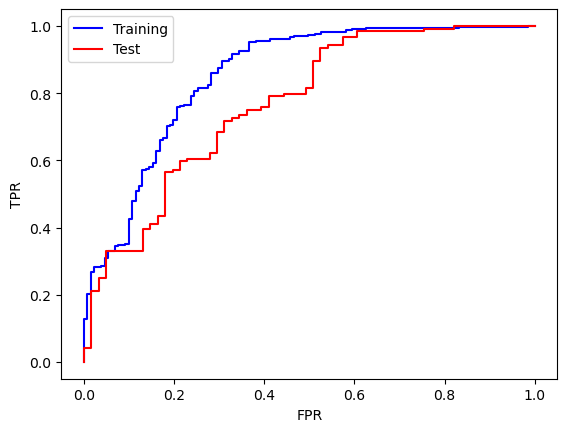

In [267]:
plt.plot(FPR,TPR,c='b',label='Training')
plt.plot(FPR1,TPR1,c='r',label='Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

# Feature Importance

In [269]:
feat_imp=[(feature,imp) for feature,imp in zip(X,RF.feature_importances_)]

In [270]:
df=pd.DataFrame(feat_imp,columns=['feature','importance']).sort_values('importance',ascending=False)
df

,feature,importance
8,Credit_History,0.253801
4,ApplicantIncome,0.203235
6,LoanAmount,0.182118
5,CoapplicantIncome,0.116391
7,Loan_Amount_Term,0.049640
12,property_Area_Semiurban,0.030241
1,Married,0.026055
2,Education,0.025819
13,property_Area_Urban,0.021481
9,Dependents_1,0.021257


In [ ]:
# So we can see from above ,Credit_History , ApplicantIncome , LoanAmount , CoapplicantIncome are most important feature for predicting loan

# XG - BOOST

In [271]:
from xgboost import XGBClassifier

In [272]:
xgb = XGBClassifier()

In [273]:
xgb.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [274]:
# Prediction on Train
xgb_pred_train = xgb.predict(X_train)

In [275]:
print(confusion_matrix(y_train,xgb_pred_train))
print(accuracy_score(y_train,xgb_pred_train))
print(precision_score(y_train,xgb_pred_train))
print(recall_score(y_train,xgb_pred_train))
print(f1_score(y_train,xgb_pred_train))

[[131   0]
 [  0 298]]
1.0
1.0
1.0
1.0


In [276]:
# Prediction on Test data
xgb_pred_test = xgb.predict(X_test)

In [277]:
print(confusion_matrix(y_test,xgb_pred_test))
print(accuracy_score(y_test,xgb_pred_test))
print(precision_score(y_test,xgb_pred_test))
print(recall_score(y_test,xgb_pred_test))
print(f1_score(y_test,xgb_pred_test))

[[ 31  30]
 [ 13 111]]
0.7675675675675676
0.7872340425531915
0.8951612903225806
0.8377358490566037


In [ ]:
# Again it is a overfitted model as there is significance loss in accuracy score , f1 score in prediction test data compare to prediction training data
so we will do hyperparameter Tuning

# Hyper parameter Tuning - XG boost

In [315]:
parameters={'learning_rate':[0.025,0.05,0.075,0.1],
       'max_depth':[4,5,6,7,8],
       'colsample_bytree':[0.7,0.8,0.9],
       'n_estimators':[25,50,75,100,125],
        'colsample_bylevel':[0.6 , 0.7,0.8,0.9]
       }

In [316]:
rsv1=RandomizedSearchCV(xgb,parameters,cv=5)

In [317]:
rsv_xg = rsv1.fit(X_train , y_train)

In [318]:
rsv_xg.best_params_

{'n_estimators': 125,
 'max_depth': 5,
 'learning_rate': 0.025,
 'colsample_bytree': 0.7,
 'colsample_bylevel': 0.8}

In [319]:
rsv_xg.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.025, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=125, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [320]:
XGB=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.025, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None)

In [321]:
XGB.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.025, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [322]:
# Prediction on train
xg_pred=XGB.predict(X_train)

In [323]:
xgb_pred_proba = XGB.predict_proba(X_train)[:,1]

In [324]:
fpr , tpr , thr = roc_curve(y_train , xgb_pred_proba)

In [325]:
roc_auc_score(y_train , xgb_pred_proba)

0.9619601414006865

In [326]:
print(confusion_matrix(y_train , xg_pred))
print(accuracy_score(y_train , xg_pred))
print(precision_score(y_train , xg_pred))
print(recall_score(y_train , xg_pred))
print(f1_score(y_train , xg_pred))

[[ 70  61]
 [  5 293]]
0.8461538461538461
0.827683615819209
0.9832214765100671
0.8987730061349692


In [327]:
# Prediction on test
xgb_pred_test = XGB.predict(X_test)

In [328]:
xgb_pred_proba1 = XGB.predict_proba(X_test)[:,1]


In [329]:
fpr1 , tpr1 , thr1 = roc_curve(y_test , xgb_pred_proba1)

In [330]:
roc_auc_score(y_test , xgb_pred_proba1)

0.7802749867794818

In [331]:
print(confusion_matrix(y_test,xgb_pred_test))
print(accuracy_score(y_test,xgb_pred_test))
print(recall_score(y_test,xgb_pred_test))
print(precision_score(y_test,xgb_pred_test))
print(f1_score(y_test,xgb_pred_test))

[[ 25  36]
 [  5 119]]
0.7783783783783784
0.9596774193548387
0.7677419354838709
0.8530465949820788


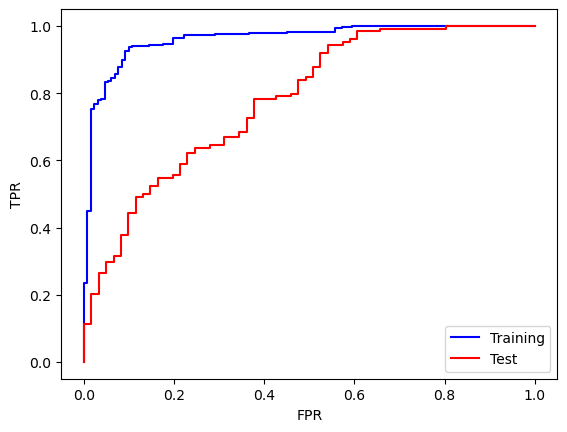

In [334]:
plt.plot(fpr,tpr,c='b',label='Training')
plt.plot(fpr1,tpr1,c='r',label='Test')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()